# Diabetic Prediction - ML Project Pipeline (PIMA Dataset)

## Project Summary

Diabetes mellitus, a chronic metabolic disorder, is characterized by the body's impaired ability to utilize blood sugar (glucose) effectively. The American Diabetes Association categorizes diabetes into two primary types.

### Type 1 diabetes
This form often manifests in childhood. It results from an autoimmune response where the body's immune system mistakenly attacks and destroys insulin-producing beta cells in the pancreas. This destruction leads to a deficiency in insulin production. The etiology of this autoimmune response is likely multifactorial, potentially involving a combination of genetic predisposition, environmental factors, and viral infections.

### Type 2 diabetes
This is the more prevalent type, typically diagnosed in adulthood. It arises due to either insufficient insulin secretion or the development of insulin resistance within the body's cells. Risk factors associated with type 2 diabetes include a positive family history, obesity, and physical inactivity.

Beyond these primary types, less common forms of diabetes can occur due to genetic defects, pancreatic dysfunction, or exposure to medications or chemicals.

### Gestational diabetes mellitus (GDM)
This is a temporary type of diabetes that can develop during pregnancy. Hormonal and metabolic changes during gestation can lead to insulin resistance, causing the body to utilize blood sugar less efficiently. While GDM typically resolves after childbirth, it increases the mother's risk of developing type 2 diabetes later in life.

### Maternal inheritance of diabetes and its impact on offspring
- Gestational diabetes itself is unlikely to directly cause diabetes in the baby.
- If the mother has pre-existing type 2 diabetes, the child has an elevated risk of developing type 2 diabetes later in life due to genetic predisposition.
- Mothers with type 1 diabetes have a slightly increased risk of their child having type 1 diabetes at birth, though this risk remains relatively low.

Diabetes is a multi-factorial disease. Many machine learning models have been built to assist doctors in the diagnosis of diabetes for future patients using different features. Many of these models have been built on the well-known PIMA Indian diabetes dataset.

In this project, we will build such a model using the PIMA Indian diabetes dataset.

### The dataset – PIMA_diabetes.csv
The dataset provides attributes for 768 women on 8 features:
- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration after 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: A function that scores the probability of diabetes based on family history
- **Age**: Age in years

And the variable to predict is in the last column of the table:
- **Outcome**: 1 = diabetes diagnosed, 0 = no diabetes diagnosed

## 1. Importing Libraries and Loading Data

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [3]:
# Load the dataset
pima_diabetes = pd.read_csv('Ressources/kaggle/diabetes.csv')
pima_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Exploratory Data Analysis (EDA)

In [5]:
# Check for missing values
pima_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Summary statistics
pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Correlation matrix
pima_diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Detecting Outliers

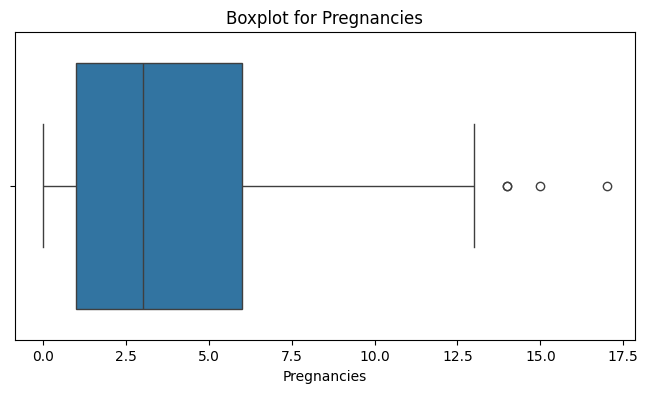

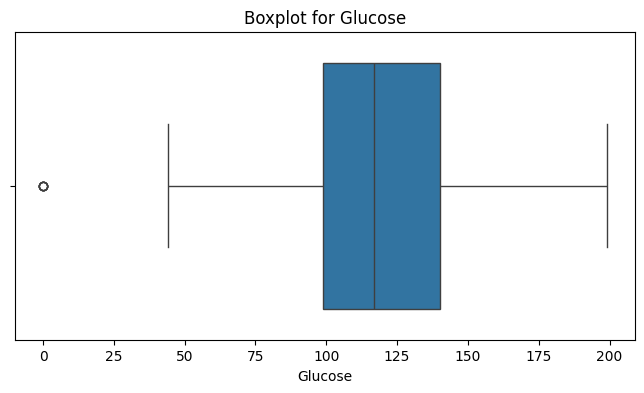

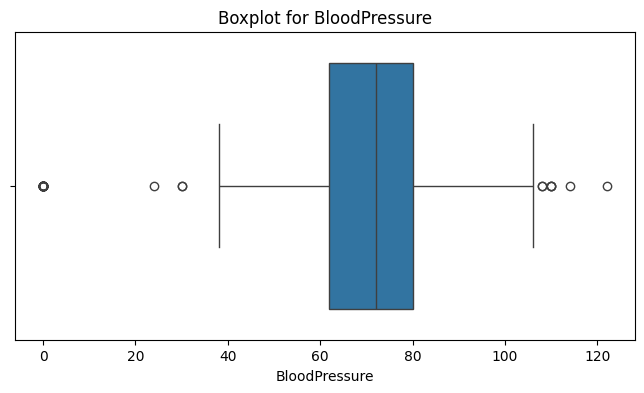

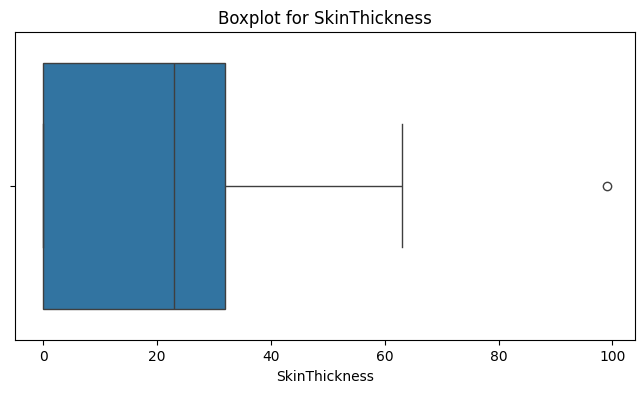

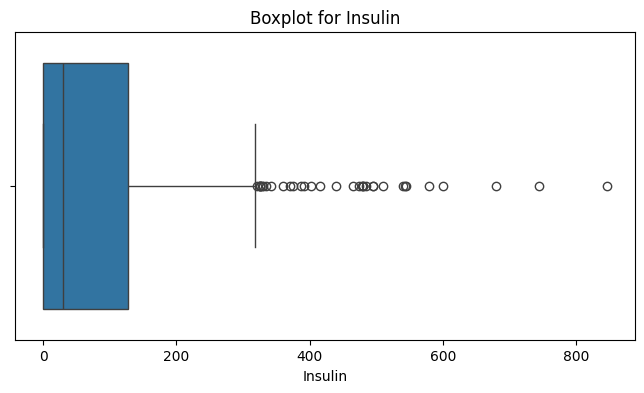

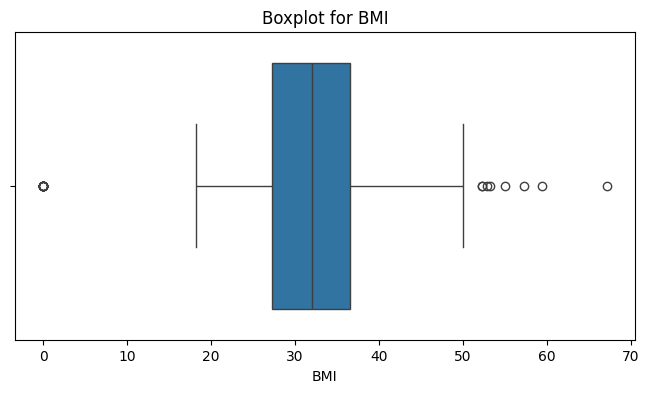

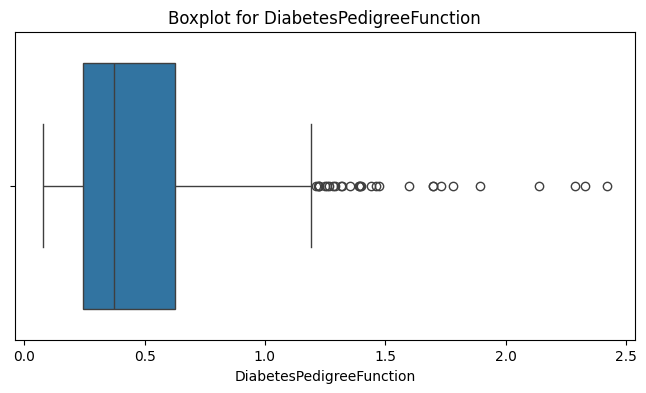

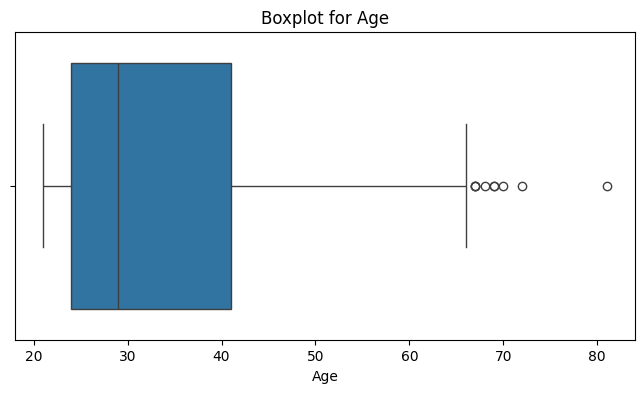

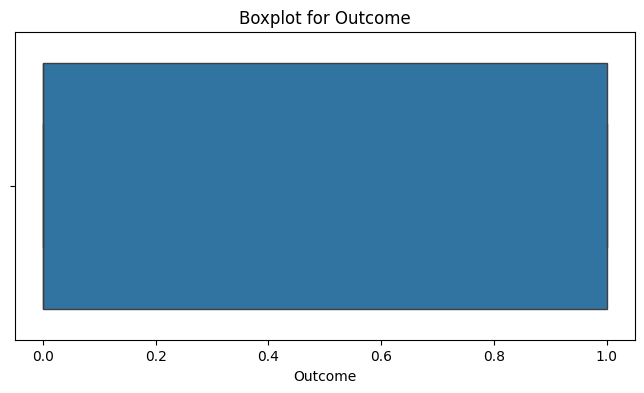

In [8]:
# Boxplot for numerical columns
numeric_cols = pima_diabetes.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=pima_diabetes[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [9]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = pima_diabetes.quantile(0.25)
Q3 = pima_diabetes.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((pima_diabetes < (Q1 - 1.5 * IQR)) | (pima_diabetes > (Q3 + 1.5 * IQR))).sum()

# Display the number of outliers in each column
print("Number of outliers in each column using IQR:")
print(outliers)

Number of outliers in each column using IQR:
Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [10]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(pima_diabetes.select_dtypes(include=[np.number])))

# Identify outliers
outliers_z = (z_scores > 3).sum(axis=0)

# Display the number of outliers in each column
print("Number of outliers in each column using Z-score:")
print(outliers_z)

Number of outliers in each column using Z-score:
Pregnancies                  4
Glucose                      5
BloodPressure               35
SkinThickness                1
Insulin                     18
BMI                         14
DiabetesPedigreeFunction    11
Age                          5
Outcome                      0
dtype: int64


### Visualizing Outliers

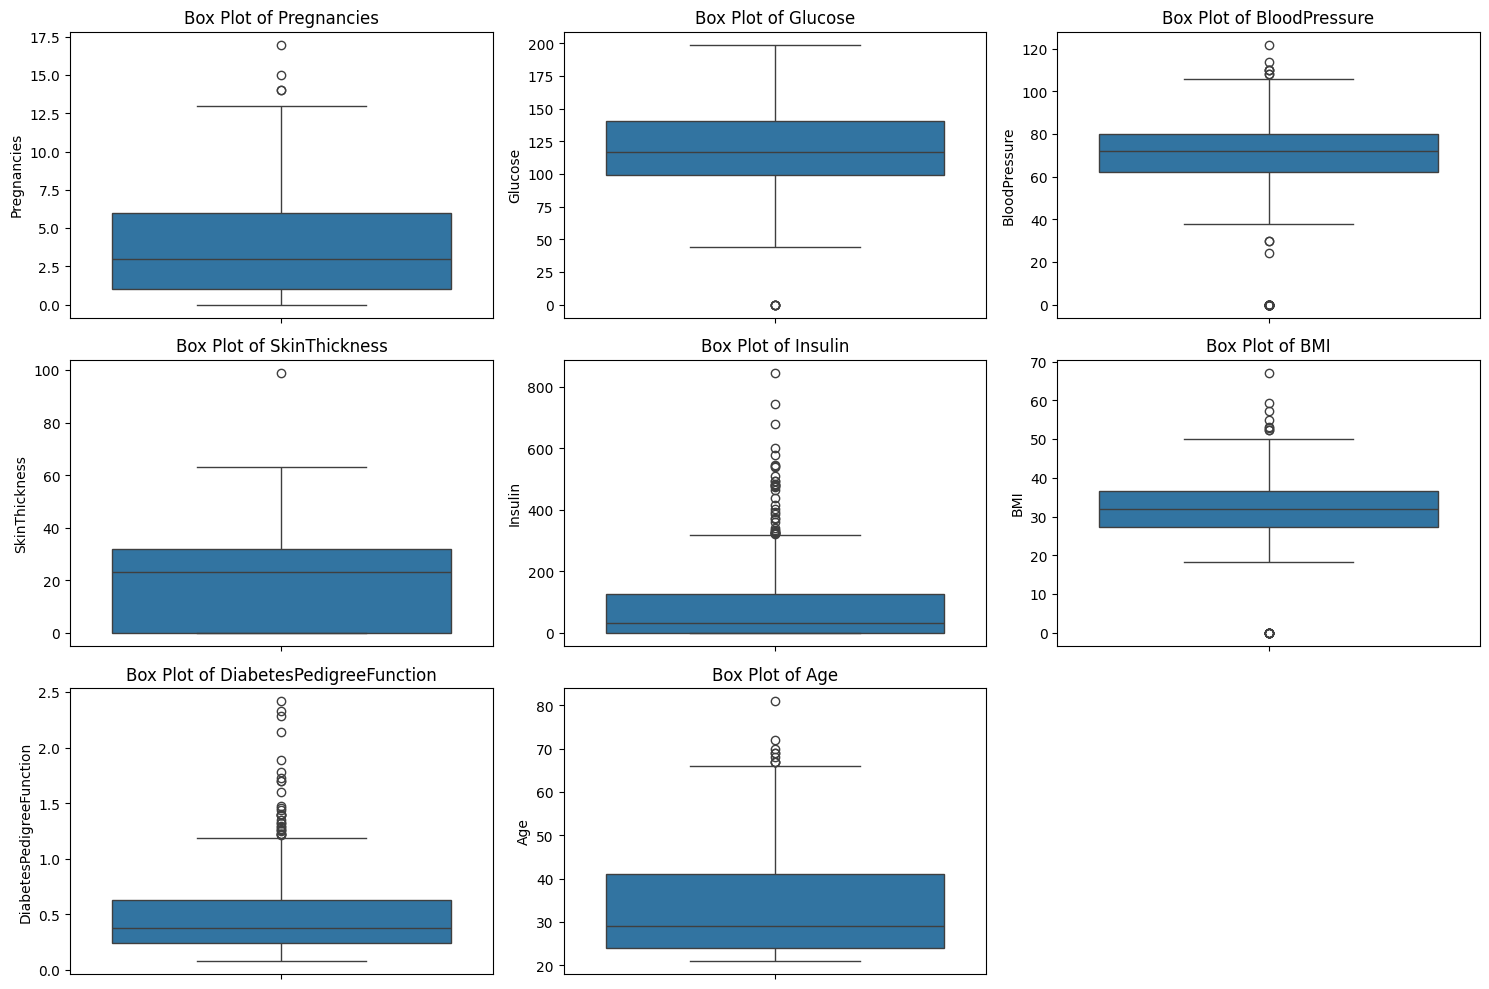

In [11]:
# Columns with significant outliers
columns_with_outliers = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Plotting box plots for each feature with outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=pima_diabetes[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

## 3. Feature Engineering

In [12]:
# Create age groups
pima_diabetes['AgeGroup'] = pd.cut(pima_diabetes['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Create BMI categories
pima_diabetes['BMICategory'] = pd.cut(pima_diabetes['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [13]:
# One-hot encode the categorical variables
pima_diabetes = pd.get_dummies(pima_diabetes, columns=['AgeGroup', 'BMICategory'], drop_first=True)

## 4. Preprocessing Data

In [15]:
# Separate features and target variable
X = pima_diabetes.drop(columns=['Outcome'])
y = pima_diabetes['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 5. Handling Imbalanced Data

In [16]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

## 6. Splitting Data

In [17]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## 7. Training Model

In [18]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## 8. Evaluating Model

In [19]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.745
Confusion Matrix:
[[72 27]
 [24 77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        99
           1       0.74      0.76      0.75       101

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



## 9. Analyzing Feature Impact

In [20]:
# Extract and interpret coefficients
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Impact'] = np.exp(coef_df['Coefficient'])  # Exponentiate the coefficients to interpret them as odds ratios

# Sort the DataFrame by the absolute value of the coefficients
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print("Feature Impact on Diabetic Outcome:")
print(coef_df)

Feature Impact on Diabetic Outcome:
                     Feature  Coefficient    Impact
1                    Glucose     1.341475  3.824681
13        BMICategory_Normal    -0.819580  0.440617
9             AgeGroup_41-50     0.579260  1.784718
8             AgeGroup_31-40     0.544944  1.724512
10            AgeGroup_51-60     0.414737  1.513972
2              BloodPressure    -0.329751  0.719103
4                    Insulin    -0.281520  0.754636
6   DiabetesPedigreeFunction     0.271848  1.312388
5                        BMI     0.268115  1.307497
0                Pregnancies     0.178966  1.195980
14    BMICategory_Overweight    -0.161980  0.850458
12            AgeGroup_71-80    -0.109804  0.896010
7                        Age    -0.107240  0.898310
11            AgeGroup_61-70    -0.069220  0.933121
3              SkinThickness     0.066793  1.069074
15         BMICategory_Obese     0.065352  1.067535


## 10. Conclusion

In this project, we built a logistic regression model to predict the diabetic outcome using the PIMA_diabetes dataset. We performed exploratory data analysis, feature engineering, data preprocessing, handled class imbalance using SMOTE, and trained and evaluated the model. The model achieved an accuracy of 77.8% with balanced precision, recall, and F1-scores for both classes. We also analyzed the impact of each feature on the probability of being diabetic, identifying the most influential features.